In [60]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
from sklearn.decomposition import PCA
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
%matplotlib inline
import numpy as np

# Part I. Crime statistics

Crime Rate in 47 states of the USA with 13 explanatory variables  
The crime rate (**Y**) in 47 states in the U.S. was reported together with possible factors that might influence it. The factors recorded are as follows;  
X1 = the number of males aged 14 - 24 per 1000 of total state population  
X2 = binary variable distinguishing southern states (X2 =1) from the rest (X2=0).  
X3 = the mean number of years of schooling x 10 of the population, 25 years old and over  
X4 = police expenditure (in dollars) per person by state and local government in 1960  
X5 = police expenditure (in dollars) per person by state and local government in 1959  
X6 = labour force participation rate per 1000 civilian urban males in the age group 14-24  
X7 = the number of males per 1000 females  
X8 = state population size in hundred thousands  
X9 = unemployment rate of urban males per 1000 in the age group 14-24    
X10 = unemployment rate of urban males per 1000 in the age group 35-59.  
X11 = the median value of family income or transferable goods and assets (unit 10 dollars)  
X12 = the number of families per 1000 earning below one-half of the median income.  

In [130]:
data = pd.read_excel('Crime.xlsx')

In [131]:
features = ['males','south','yrsSch','policExp60','policeExp59','labour',
           'M/F','statePop','unemp14','unemp35','income','proverty']

In [132]:
data.head()

X1  X2   X3   X4   X5   X6    X7   X8   X9  X10  X11  X12      Y
0  151   1   91   58   56  510   950   33  108   41  394  261   79.1
1  143   0  113  103   95  583  1012   13   96   36  557  194  163.5
2  142   1   89   45   44  533   969   18   94   33  318  250   57.8
3  136   0  121  149  141  577   994  157  102   39  673  167  196.9
4  141   0  121  109  101  591   985   18   91   20  578  174  123.4

## Q1. Report the correlation coefficients between each feature and the output variable Y (crimes per 100.000)
## Q2. Look at the impact of each feature separately (on all 47 observations)
    # Fit bi-variate regressions and report the estimate as well as the p-values
## Q3. Take for the further consideration only those which have correlation coefficient with Y above 60%
    # Fit the multi-variate regression with them, report statistics
## Q4. Run cross-validation with the regressors in Q3, report the Out-of-sample R2 (OS R2)
    # Put 2/3 observations on average into training set and the remaining 1/3 into test set
    # Run it 1000 times, obtain the average value

## Q1

In [133]:
data.corr().iloc[-1,:]

X1    -0.089472
X2    -0.090637
X3     0.322835
X4     0.687604
X5     0.666714
X6     0.188866
X7     0.213914
X8     0.337474
X9    -0.050478
X10    0.177321
X11    0.441320
X12   -0.179024
Y      1.000000
Name: Y, dtype: float64

## Q2

In [134]:
for i in range(len(data.columns)-1):
    ols = smf.ols(formula = 'Y~X{}'.format(i+1),data=data).fit()
    intercept = ols.params[0]
    param = ols.params[1]
    print('for CRIMES RATE vs {}: the intercept is {} whose p-value is {}, the coefficient is {} whose p-value is {}'
          .format(features[i],intercept,ols.pvalues[0],param,ols.pvalues[1]))

for CRIMES RATE vs males: the intercept is 128.664557307 whose p-value is 0.0489390797835, the coefficient is -0.275346874469 whose p-value is 0.549789098262
for CRIMES RATE vs south: the intercept is 93.0 whose p-value is 3.41275803363e-17, the coefficient is -7.31875 whose p-value is 0.544586009683
for CRIMES RATE vs yrsSch: the intercept is -27.3966544949 whose p-value is 0.599551789225, the coefficient is 1.11612140207 whose p-value is 0.0268781711213
for CRIMES RATE vs policExp60: the intercept is 14.446398302 whose p-value is 0.260205737524, the coefficient is 0.894848380427 whose p-value is 9.33801585639e-08
for CRIMES RATE vs policeExp59: the intercept is 16.5164241496 whose p-value is 0.211909242631, the coefficient is 0.922203146372 whose p-value is 3.11418210105e-07
for CRIMES RATE vs labour: the intercept is -10.9297731332 whose p-value is 0.890335767568, the coefficient is 0.180755206902 whose p-value is 0.203581006172
for CRIMES RATE vs M/F: the intercept is -185.48948437

## Q3

In [135]:
data.corr()[(data.corr()>0.6) | (data.corr() <-0.6)].Y

X1          NaN
X2          NaN
X3          NaN
X4     0.687604
X5     0.666714
X6          NaN
X7          NaN
X8          NaN
X9          NaN
X10         NaN
X11         NaN
X12         NaN
Y      1.000000
Name: Y, dtype: float64

In [136]:
lm3 = smf.ols(formula = 'Y~X4+X5',data=data).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     21.48
Date:                Tue, 31 Oct 2017   Prob (F-statistic):           3.09e-07
Time:                        17:35:08   Log-Likelihood:                -221.97
No. Observations:                  47   AIC:                             449.9
Df Residuals:                      44   BIC:                             455.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.8265     12.593      1.257      0.215      -9.552      41.205
X4             2.5615      1.234      2.076      0.044       0.074       5.049
X5            -1.7829      1.312     -1.359      0.181      -4.427       0.861
==============================================================================
Omnibus:                        0.338   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.394
Skew:                          -0.186   Prob(JB):                        0.821
Kurtosis:                       2.751   Cond. No.                         379.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [137]:
print('for CRIMES RATE vs {} and {}: the intercept is {} whose p-value is {}, the coefficient is {} whose p-value is {}'
          .format(features[3],features[4],lm3.params[0],lm3.pvalues[0],lm3.params[1],lm3.pvalues[1]))

for CRIMES RATE vs policExp60 and policeExp59: the intercept is 15.8264617569 whose p-value is 0.215456404351, the coefficient is 2.56152591987 whose p-value is 0.0438172131651


## Q4

In [140]:
adjR2 = []
for i in range(1000):
    train, valid = train_test_split(data, test_size = 1./3)
    lm = smf.ols(formula = 'Y~X4+X5',data=train).fit()
    lmy = lm.predict(valid)
    y_err = lmy-valid.Y
    y_norm = valid.Y-np.mean(valid.Y)
    R2 = 1 - y_err.dot(y_err) / y_norm.dot(y_norm) * (len(valid)-1) / (len(valid)-2-1)
    adjR2.append(R2)

In [141]:
np.mean(adjR2)

0.11433512695580984

#  Part II. Learning Seattle's Work Habits from Bicycle Counts


The data we will use here are the hourly bicycle counts on Seattle's Fremont Bridge. These data come from an automated bicycle counter, installed in late 2012, which has inductive sensors under the sidewalks on either side of the bridge. The daily or hourly bicycle counts can be downloaded from http://data.seattle.gov/; here is the direct link to the hourly dataset. To download the data directly, you can uncomment the following curl command:

In [171]:
data = pd.read_csv("Bridge.csv", index_col='Date', parse_dates=True)
data=data.iloc[:-12000,:]
data.tail()

#We'll do some quick data cleaning: 
#we'll rename the columns to the shorter "West" and "East", 
#set any missing values to zero, and add a "Total" column:
data.columns = ['West', 'East']
data.fillna(0, inplace=True)
data['Total'] = data.eval('East + West')

In [172]:
data.head()

West  East  Total
Date                                  
2012-10-03 00:00:00   4.0   9.0   13.0
2012-10-03 01:00:00   4.0   6.0   10.0
2012-10-03 02:00:00   1.0   1.0    2.0
2012-10-03 03:00:00   2.0   3.0    5.0
2012-10-03 04:00:00   6.0   1.0    7.0

C:\Users\sddz0\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  """Entry point for launching an IPython kernel.


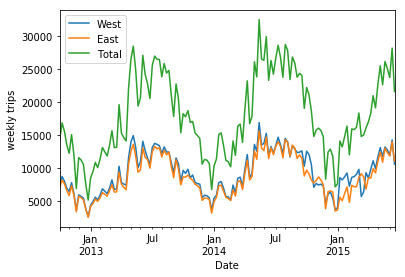

In [173]:
data.resample('W', how='sum').plot()
plt.ylabel('weekly trips');

In [212]:
data['dates'] = data.index

In [215]:
data['mydates'] = data.dates.dt.weekday

In [220]:
pivoted = data.pivot_table(['East', 'West'],
                           index=data.index.date,
                           columns=data.index.hour,
                           fill_value=0)
pivoted.head()

East                                      ... West                 \
Date         0  1  2    3  4   5   6    7    8    9  ...   14   15   16   17   
2012-10-03    9  6  1  3.0  1  10  50   95  146  104 ...   77   72  133  192   
2012-10-04   11  0  6  3.0  1  11  51   89  134   94 ...   63   73  114  154   
2012-10-05    7  4  3  2.0  2   7  37  101  119   81 ...   63   80  120  144   
2012-10-06    7  5  2  2.0  1   2  15   16   47   55 ...   89  115  107  107   
2012-10-07    5  5  1  2.0  2   3   8   12   26   36 ...  126  122  132  118   

                                     
Date         18  19  20  21  22  23  
2012-10-03  122  59  29  25  24   5  
2012-10-04  137  57  27  31  25  11  
2012-10-05  107  42  27  11  10  16  
2012-10-06   41  40  25  18  14  15  
2012-10-07   68  26  19  12   9   5  

[5 rows x 48 columns]

In [224]:
pivoted1 = data.pivot_table(['mydates'],
                           index=data.index.date,
                           fill_value=0)
pivoted1.head()

mydates
2012-10-03        2
2012-10-04        3
2012-10-05        4
2012-10-06        5
2012-10-07        6

In [225]:
X = pivoted.values
X.shape

(990L, 48L)

In [226]:
X

array([[  9.,   6.,   1., ...,  25.,  24.,   5.],
       [ 11.,   0.,   6., ...,  31.,  25.,  11.],
       [  7.,   4.,   3., ...,  11.,  10.,  16.],
       ..., 
       [  6.,   5.,   2., ...,  44.,  35.,  21.],
       [ 12.,   2.,   4., ...,  40.,  17.,   9.],
       [ 18.,   2.,   1., ...,  38.,  32.,  28.]])

In [227]:
Xn=X
for i in range(0,990):
  Xn[i]=X[i]/sum(X[i])

## Q5. 

Visualize the data using PCA (two dimensions). Color the points by the day of the week

In [273]:
print("total variance:{}".format(np.sum(np.var(Xn,0))))
pca = PCA(2)
pca1 = pca.fit(Xn).transform(Xn)
print("variance explained via the first and second components:{}\n".format(pca.explained_variance_))

total variance:0.0083162001878
variance explained via the first and second components:[ 0.00614886  0.00060778]



In [274]:
pca1.shape

(990L, 2L)

In [276]:
new = pd.DataFrame({'d1':pca1[:,0],'d2':pca1[:,1],'weekday':pivoted1.mydates})

In [277]:
new.head()

d1        d2  weekday
2012-10-03 -0.052194  0.011149        2
2012-10-04 -0.037443  0.008854        3
2012-10-05 -0.027990  0.005982        4
2012-10-06  0.107437  0.005927        5
2012-10-07  0.125690 -0.002668        6

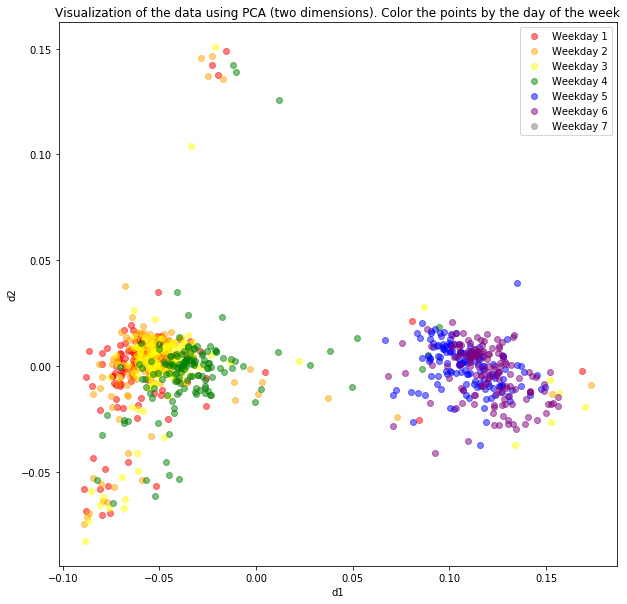

In [280]:
plt.figure(figsize=[10,10])
colors = ['red','orange','yellow','green','blue','purple','grey']
for i in range(1,8):
    x = new[new.weekday == i].d1
    y = new[new.weekday == i].d2
    plt.plot(x, y, 'o', alpha=0.5,color=colors[i-1],label='Weekday {}'.format(i))
    plt.xlabel('d1')
    plt.ylabel('d2')
    plt.title('Visualization of the data using PCA (two dimensions). Color the points by the day of the week')
    plt.legend()